In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from urllib.request import urlretrieve
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import opendatasets as od

In [2]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [3]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [4]:
dane=pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [5]:
dane

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [6]:
#Co oznaczają dane kolumny
schemat=pd.read_csv('stackoverflow-developer-survey-2020/survey_results_schema.csv',
                    index_col='Column').QuestionText

In [7]:
schemat

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [8]:
interesujace_kol= [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [9]:
dane_wybrane=dane[interesujace_kol]

In [10]:
dane_wybrane

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
schemat_wybrane=schemat[interesujace_kol]

In [12]:
schemat_wybrane

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [13]:
#przejrzyjmy sobie info o secie
dane_wybrane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [14]:
dane_wybrane['Age1stCode']=pd.to_numeric(dane_wybrane['Age1stCode'],errors='coerce')
dane_wybrane['YearsCode']=pd.to_numeric(dane_wybrane['YearsCode'],errors='coerce')
dane_wybrane['YearsCodePro']=pd.to_numeric(dane_wybrane['YearsCodePro'],errors='coerce')

<ipython-input-14-0fc82bb03b90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_wybrane['Age1stCode']=pd.to_numeric(dane_wybrane['Age1stCode'],errors='coerce')
<ipython-input-14-0fc82bb03b90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_wybrane['YearsCode']=pd.to_numeric(dane_wybrane['YearsCode'],errors='coerce')
<ipython-input-14-0fc82bb03b90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [15]:
# teraz statystyki zobaczmy
dane_wybrane.describe()
#Age 10- minimum za małe, od kiedy programiści mają rok i max tez jakis niezly xDDD
#Age1stCode- to samo 

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [16]:
dane_wybrane.drop(dane_wybrane[dane_wybrane.Age<10].index,inplace=True)
dane_wybrane.drop(dane_wybrane[dane_wybrane.Age>100].index,inplace=True)
dane_wybrane.drop(dane_wybrane[dane_wybrane.Age1stCode<10].index,inplace=True)
dane_wybrane.drop(dane_wybrane[dane_wybrane.WorkWeekHrs>140].index,inplace=True)

C:\Users\makus\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\makus\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\makus\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\makus\anaconda3\lib

In [17]:
dane_wybrane['Gender'].value_counts()

Man                                                            42072
Woman                                                           3603
Non-binary, genderqueer, or gender non-conforming                320
Man;Non-binary, genderqueer, or gender non-conforming            100
Woman;Non-binary, genderqueer, or gender non-conforming           74
Woman;Man                                                         61
Woman;Man;Non-binary, genderqueer, or gender non-conforming       22
Name: Gender, dtype: int64

In [18]:
dane_wybrane.where(~(dane_wybrane.Gender.str.contains(';', na=False)),np.nan,inplace=True)

C:\Users\makus\anaconda3\lib\site-packages\pandas\core\generic.py:9286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(


In [19]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
dane_wybrane.Country.nunique()

183

In [21]:
top_kraje = dane_wybrane.Country.value_counts().head(15)
top_kraje

United States         10979
India                  8169
Germany                3546
United Kingdom         3358
Canada                 1978
France                 1759
Brazil                 1737
Netherlands            1217
Poland                 1160
Spain                  1085
Australia              1042
Italy                  1034
Russian Federation      987
Pakistan                793
Sweden                  787
Name: Country, dtype: int64

<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

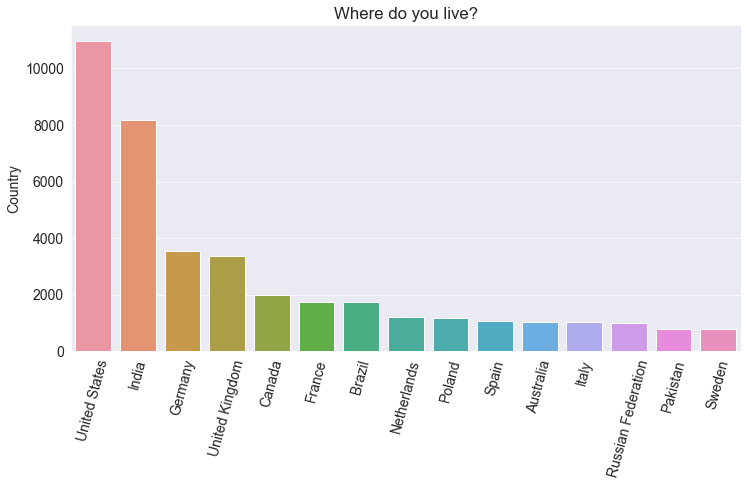

In [22]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schemat.Country)
sns.barplot(x=top_kraje.index,y=top_kraje)

In [23]:
# CWICZENIE
# PROCENT ANGIELSKICH DO PROCENTA NIEANGIELSKICH
with open('countries-languages.txt') as f:
    lines = f.readlines()

for i in range(len(lines)):
    lines[i]=lines[i][:-2]
    lines[i]=lines[i].split(',',1)

jezyki=pd.DataFrame(lines,columns=['Kraj','Język'])
jezyki=jezyki.drop([0],axis=0)
subs='English'
anglo=[]
nieanglo=[]

for ind in jezyki.index:
    if subs in jezyki['Język'][ind]:
        anglo.append(jezyki['Kraj'][ind])
    else:
        nieanglo.append(jezyki['Kraj'][ind])
dane_kraje_unikalne=list(dane_wybrane.Country.unique())
dane_kraje_anglo=dane_wybrane[dane_wybrane.Country.isin(anglo)==True]
dane_kraje_nieanglo=dane_wybrane[dane_wybrane.Country.isin(anglo)==False]
all_kraje=len(dane_wybrane.Country)
anglo_kraje=len(dane_kraje_anglo.Country)
nieanglo_kraje=len(dane_kraje_nieanglo.Country)
print(f'Udział krajów anglojęzycznych w odpowiedziach: {round(anglo_kraje/all_kraje*100,2)} %')
print(f'Udział krajów nieanglojęzycznych w odpowiedziach: {round(nieanglo_kraje/all_kraje*100,2)} %')

Udział krajów anglojęzycznych w odpowiedziach: 59.95 %
Udział krajów nieanglojęzycznych w odpowiedziach: 40.05 %


Text(0.5, 1.0, 'Rozkład respondentów')

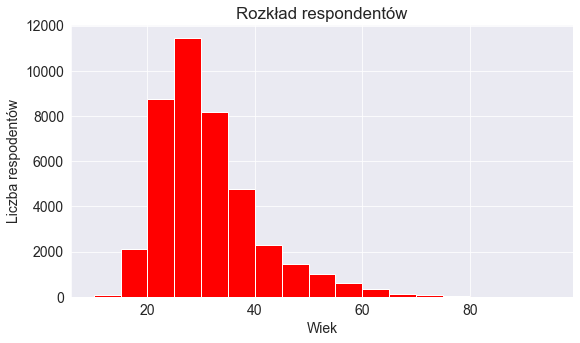

In [24]:
plt.hist(dane_wybrane.Age,bins=np.arange(10,100,5),color='red')
plt.xlabel('Wiek')
plt.ylabel('Liczba respodentów')
plt.title('Rozkład respondentów')

In [25]:
#Exercise: You may want to filter out responses by age (or age group) if you'd like to analyze and
#compare the survey results for different age groups. Create a new column called AgeGroup containing
#values like Less than 10 years, 10-18 years, 18-30 years, 30-45 years, 45-60 years and
#Older than 60 years. Then, repeat the analysis in the rest of this notebook for each age group.

dane_wybrane['AgeGroup']=np.nan

for ind in dane_wybrane.index:
    if dane_wybrane.Age[ind]<10:
        dane_wybrane.AgeGroup[ind]='Less than 10 years'
    elif dane_wybrane.Age[ind] in range(10,19):
        dane_wybrane.AgeGroup[ind]='10-18 years'
    elif dane_wybrane.Age[ind] in range(18,31):
        dane_wybrane.AgeGroup[ind]='18-30 years'
    elif dane_wybrane.Age[ind] in range(30,46):
        dane_wybrane.AgeGroup[ind]='30-45 years'
    elif dane_wybrane.Age[ind] in range(45,61):
        dane_wybrane.AgeGroup[ind]='45-60 years'
    else:
        dane_wybrane.AgeGroup[ind]='Over 60 years'

<ipython-input-25-ead11d951bc5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_wybrane['AgeGroup']=np.nan
<ipython-input-25-ead11d951bc5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_wybrane.AgeGroup[ind]='Over 60 years'
C:\Users\makus\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_bloc

In [26]:
#licz_plec=dane_wybrane.Gender.value_counts(dropna=False)
licz_plec=dane_wybrane.Gender.value_counts()


Text(0.5, 1.0, 'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.')

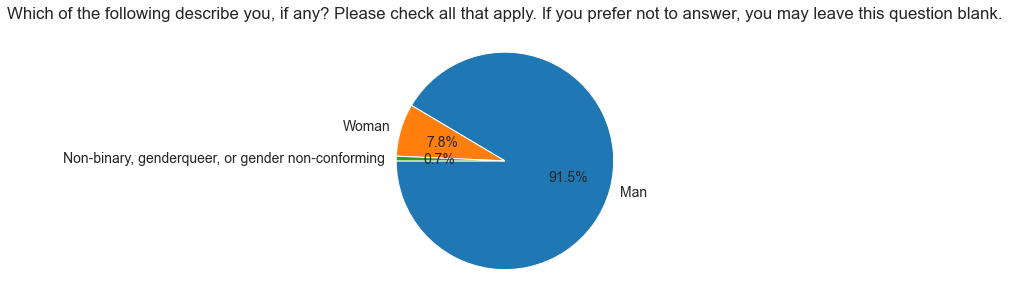

In [27]:
plt.pie(licz_plec,labels=licz_plec.index,autopct='%1.1f%%',startangle=180) 
plt.title(schemat.Gender)

In [28]:
#Exercise: It would be interesting to compare the survey responses & preferences across genders.
#Repeat this analysis with these breakdowns. How do the relative education levels differ
#across genders? How do the salaries vary?
kobiety=dane_wybrane.loc[dane_wybrane.Gender=='Woman']
mezczyzni=dane_wybrane.loc[dane_wybrane.Gender=='Man']
niebinarni=dane_wybrane.loc[dane_wybrane.Gender=='Non-binary, genderqueer, or gender non-conforming']

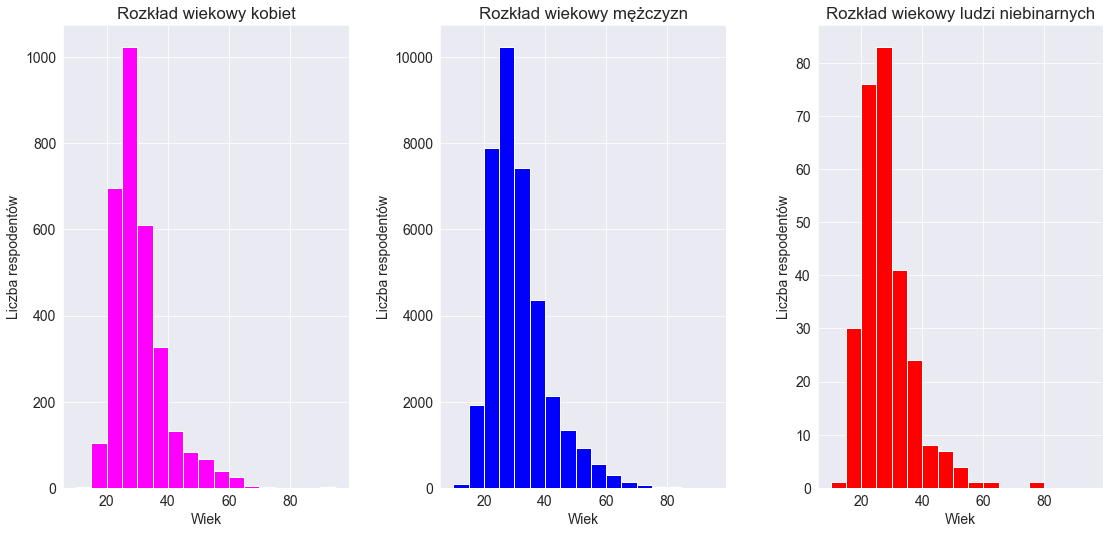

In [29]:
fig,axes= plt.subplots(1,3,figsize=(16,8))

axes[0].hist(kobiety.Age,bins=np.arange(10,100,5),color='fuchsia')
axes[0].set_xlabel('Wiek')
axes[0].set_ylabel('Liczba respodentów')
axes[0].set_title('Rozkład wiekowy kobiet')

axes[1].hist(mezczyzni.Age,bins=np.arange(10,100,5),color='blue')
axes[1].set_xlabel('Wiek')
axes[1].set_ylabel('Liczba respodentów')
axes[1].set_title('Rozkład wiekowy mężczyzn')

axes[2].hist(niebinarni.Age,bins=np.arange(10,100,5),color='red')
axes[2].set_xlabel('Wiek')
axes[2].set_ylabel('Liczba respodentów')
axes[2].set_title('Rozkład wiekowy ludzi niebinarnych')

plt.tight_layout(pad=2)

C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
  Text(1, 0, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
  Text(2, 0, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'),
  Text(3, 0, 'Professional degree (JD, MD, etc.)'),
  Text(4, 0, 'Some college/university study without earning a degree'),
  Text(5, 0, 'Associate degree (A.A., A.S., etc.)'),
  Text(6, 0, 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
  Text(7, 0, 'Primary/elementary school'),
  Text(8, 0, 'I never completed any formal education')])

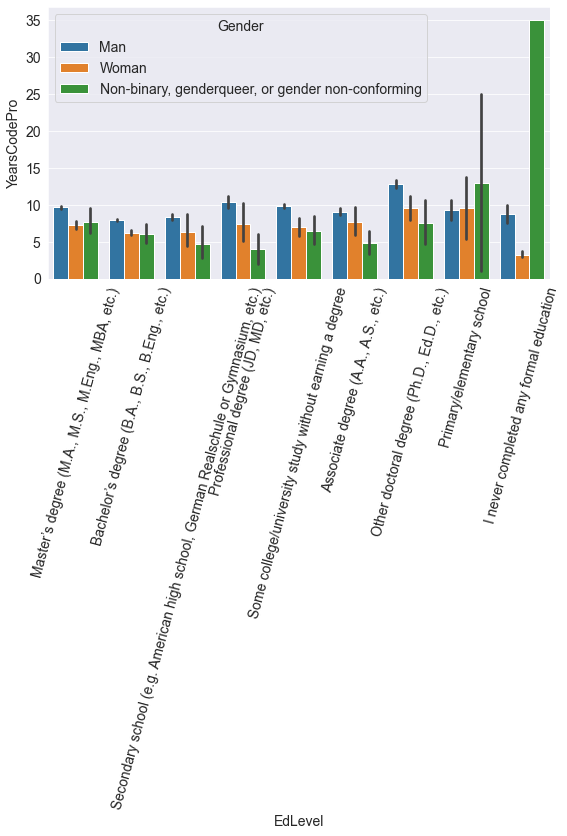

In [30]:
sns.barplot('EdLevel','YearsCodePro',hue='Gender',data=dane_wybrane)
plt.xticks(rotation=75)

<AxesSubplot:xlabel='EdLevel', ylabel='Gender'>

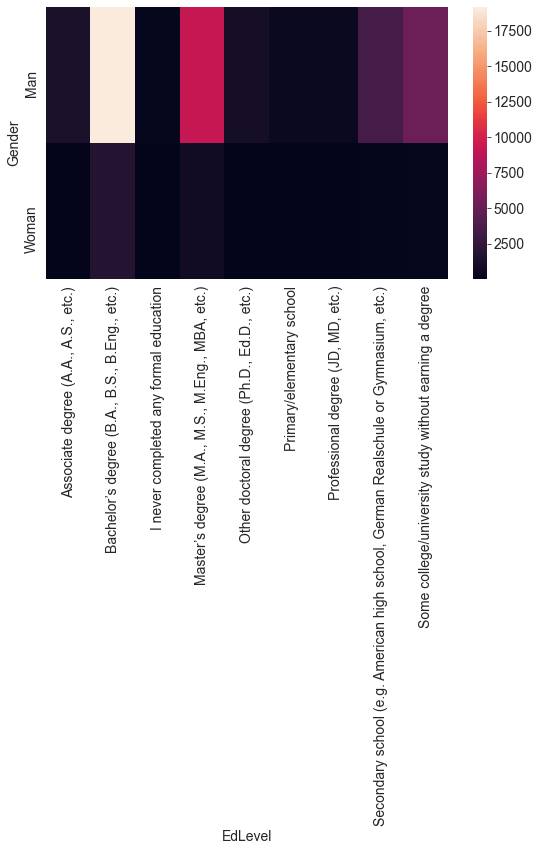

In [31]:
x=dane_wybrane.loc[dane_wybrane.Gender!='Non-binary, genderqueer, or gender non-conforming'].groupby('Gender')['EdLevel'].value_counts().unstack()
sns.heatmap(x)

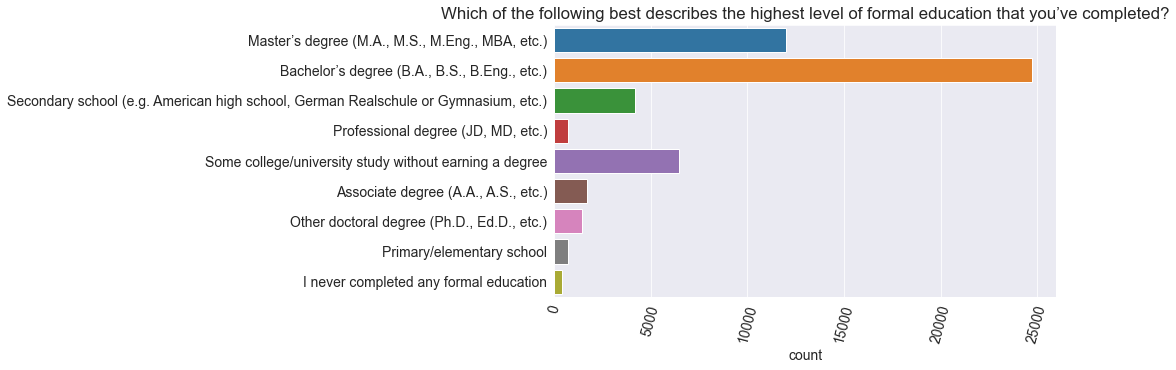

In [32]:
# Education 
sns.countplot(y=dane_wybrane.EdLevel)
plt.xticks(rotation=75);
plt.title(schemat['EdLevel'])
plt.ylabel(None);

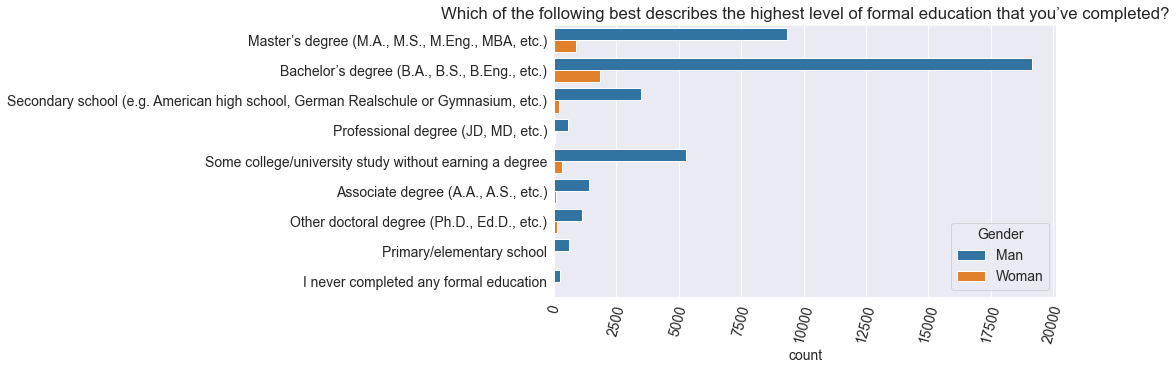

In [33]:
#Exercises: The graph currently shows the number of respondents for each option. 
#Can you modify it to show the percentage instead? Further, try comparing the percentages
#for each degree for men vs. women.
bez_niebinar=dane_wybrane.loc[np.logical_or(dane_wybrane['Gender']=='Man',dane_wybrane['Gender']=='Woman')]
sns.countplot(y='EdLevel',hue='Gender',data=bez_niebinar)
plt.xticks(rotation=75);
plt.title(schemat['EdLevel'])
plt.ylabel(None);

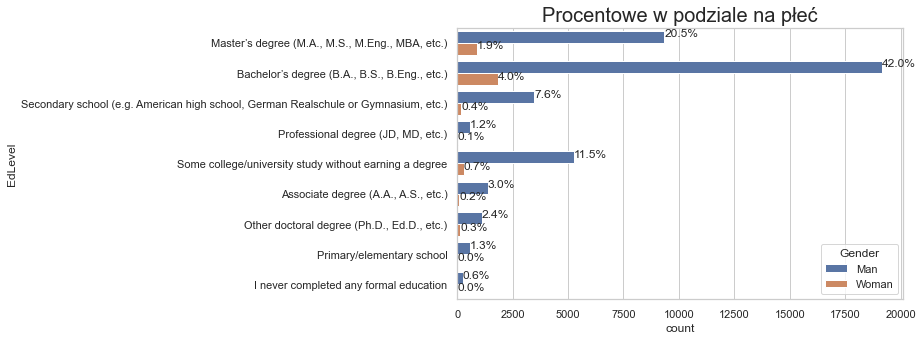

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = len(bez_niebinar['EdLevel'])*1.
ax = sns.countplot(y='EdLevel',hue='Gender', data=bez_niebinar)
plt.title('Procentowe w podziale na płeć', fontsize=20)
for p in ax.patches:
    percentage ='{:.1f}%'.format(100*p.get_width()/total)   
    x = p.get_x() + p.get_width()+0.02
    y = p.get_y()+p.get_height()/2
    ax.annotate(percentage, (x, y))
plt.show()

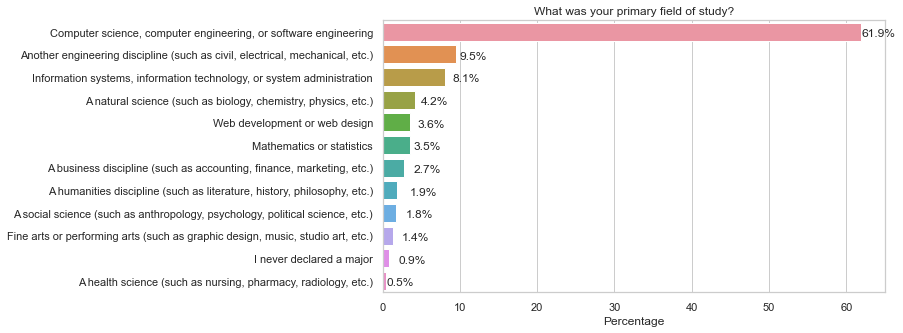

In [35]:
undergrad_pct = dane_wybrane.UndergradMajor.value_counts() * 100 / dane_wybrane.UndergradMajor.count()

ax=sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schemat.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');
percentage=list(map('{:.1f}%'.format,undergrad_pct.values))
ax.annotate(percentage[0],(62,0.2))
ax.annotate(percentage[1],(10,1.2))
ax.annotate(percentage[2],(9,2.2))
ax.annotate(percentage[3],(5,3.2))
ax.annotate(percentage[4],(4.5,4.2))
ax.annotate(percentage[5],(4,5.2))
ax.annotate(percentage[6],(4,6.2))
ax.annotate(percentage[7],(3.5,7.2))
ax.annotate(percentage[8],(3,8.2))
ax.annotate(percentage[9],(2.5,9.2))
ax.annotate(percentage[10],(2,10.2))
ax.annotate(percentage[-1],(0.5,11.2))
plt.show()

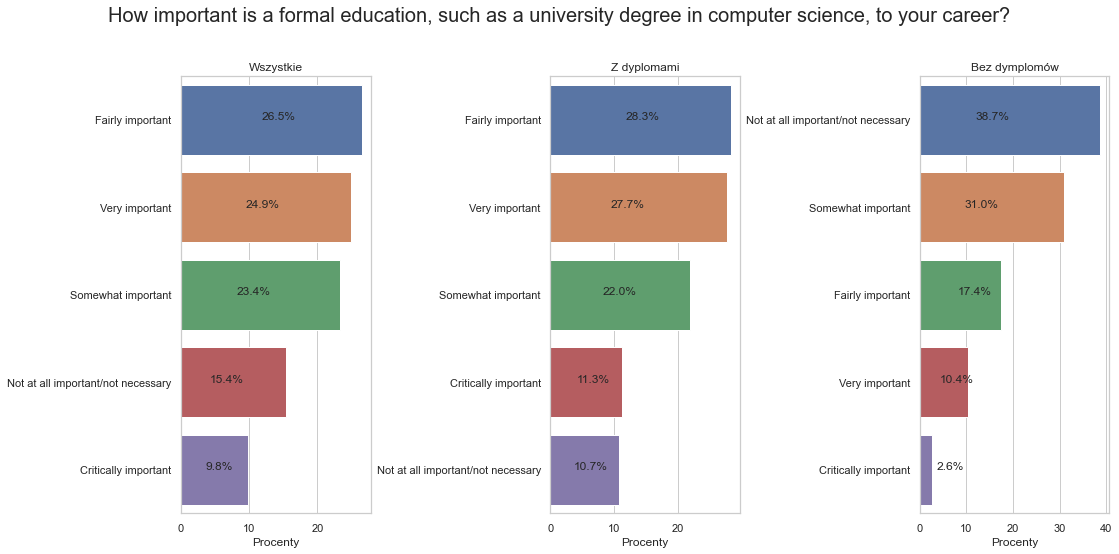

In [36]:
#Exercises: Analyze the NEWEdImpt column for respondents who hold some college degree vs. those who don't.
#Do you notice any difference in opinion?
dyplomowe=list(dane_wybrane.EdLevel.value_counts().index[[0,1,4,5,6]])
niedyplomowe=list(dane_wybrane.EdLevel.value_counts().index[[2,3,7,8]])
dyplom=dane_wybrane.loc[dane_wybrane.EdLevel.isin(dyplomowe)]
niedyplom=dane_wybrane.loc[dane_wybrane.EdLevel.isin(niedyplomowe)]

fig,axes= plt.subplots(1,3,figsize=(16,8))
exe_pct = dane_wybrane.NEWEdImpt.value_counts() * 100 / dane_wybrane.NEWEdImpt.count()
dyplom_pct=dyplom.NEWEdImpt.value_counts()*100/dyplom.NEWEdImpt.count()
niedyplom_pct=niedyplom.NEWEdImpt.value_counts()*100/niedyplom.NEWEdImpt.count()

fig.suptitle(schemat.NEWEdImpt,fontsize=20)

axes[0].set_title('Wszystkie')
sns.barplot(x=exe_pct,y=exe_pct.index,ax=axes[0])
axes[0].set_xlabel('Procenty')
x0=[]
y0=[]
for p in ax.patches:
    percentage=list(round(dane_wybrane.NEWEdImpt.value_counts() * 100 / dane_wybrane.NEWEdImpt.count(),1))
    x =p.get_x() + p.get_width()+0.02
    x0.append(x)
    y =p.get_y()+p.get_height()/2
    y0.append(y)
x0[0]=x0[0]-50
for i in range(len(percentage)):
    axes[0].annotate(f'{percentage[i]}%', (x0[i], y0[i]))

axes[1].set_title('Z dyplomami')
sns.barplot(x=dyplom_pct,y=dyplom_pct.index,ax=axes[1])
axes[1].set_xlabel('Procenty')
x1=[]
y1=[]
for p in ax.patches:
    percentage=list(round(dyplom.NEWEdImpt.value_counts() * 100 / dyplom.NEWEdImpt.count(),1))
    x =p.get_x() + p.get_width()+0.02
    x1.append(x)
    y =p.get_y()+p.get_height()/2
    y1.append(y)
x1[0]=x1[0]-50
for i in range(len(percentage)):
    axes[1].annotate(f'{percentage[i]}%', (x1[i], y1[i]))

axes[2].set_title('Bez dymplomów')
sns.barplot(x=niedyplom_pct,y=niedyplom_pct.index,ax=axes[2])
axes[2].set_xlabel('Procenty')
x2=[]
y2=[]
for p in ax.patches:
    percentage=list(round(niedyplom.NEWEdImpt.value_counts() * 100 / niedyplom.NEWEdImpt.count(),1))
    x =p.get_x() + p.get_width()+0.02
    x2.append(x)
    y =p.get_y()+p.get_height()/2
    y2.append(y)
x2[0]=x2[0]-50
for i in range(len(percentage)):
    axes[2].annotate(f'{percentage[i]}%', (x1[i], y1[i]))

plt.tight_layout(pad=2, w_pad=0.5)

<h6>Employment</h6>

In [37]:
schemat.Employment

'Which of the following best describes your current employment status?'

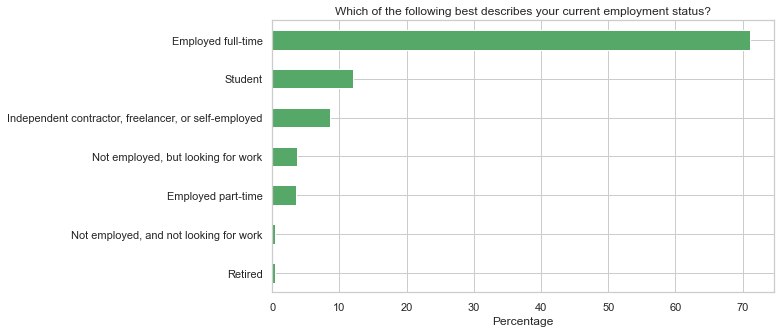

In [38]:
(dane_wybrane.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schemat.Employment)
plt.xlabel('Percentage');

In [39]:
#Exercise: Add a new column EmploymentType containing the values 
#Enthusiast (student or not employed but looking for work),
#Professional (employed full-time, part-time or freelancing),
#and Other (not employed or retired). For each of the graphs that follow, 
#show a comparison between Enthusiast and Professional.
dane_wybrane['EmploymentType']=np.nan
enthu=list(dane_wybrane.Employment.value_counts().index[[1,3]])
pro=list(dane_wybrane.Employment.value_counts().index[[0,2,4]])
oth=list(dane_wybrane.Employment.value_counts().index[[5,6]])
for ind in dane_wybrane.index:
    if dane_wybrane['Employment'][ind] in enthu :
        dane_wybrane['EmploymentType'][ind]='Enthusiast'
    elif dane_wybrane['Employment'][ind] in pro:
        dane_wybrane['EmploymentType'][ind]='Professional'
    elif dane_wybrane['Employment'][ind] in oth:
        dane_wybrane['EmploymentType'][ind]='Other'

<ipython-input-39-9f6916f3fcc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_wybrane['EmploymentType']=np.nan
<ipython-input-39-9f6916f3fcc3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_wybrane['EmploymentType'][ind]='Professional'
C:\Users\makus\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

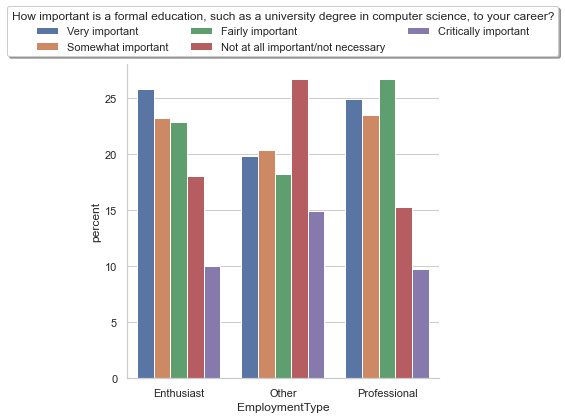

In [40]:
x,y = 'EmploymentType', 'NEWEdImpt'

(dane_wybrane
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',legend=False))
plt.legend(title=schemat.NEWEdImpt,loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, fancybox=True, shadow=True)

In [41]:
schemat.DevType

'Which of the following describe you? Please select all that apply.'

In [42]:
dane_wybrane.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                        4143
Developer, back-end                                                                                                                                                                                          2850
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                               2100
Developer, back-end;Developer, full-stack                                                                                                                                                                    1378
Developer, front-end                                                                                                                                            

In [43]:
#fukcja robiaca oddzielenie jaka role ma ktos
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [44]:
dev_type = split_multicolumn(dane_wybrane.DevType)

In [45]:
dev_type_total = dev_type.sum().sort_values(ascending=False)
for i in range(len(dev_type_total)):
    print(f'{i} {dev_type_total.index[i]}')

0 Developer, full-stack
1 Developer, back-end
2 Developer, front-end
3 Developer, desktop or enterprise applications
4 Developer, mobile
5 DevOps specialist
6 Database administrator
7 Designer
8 System administrator
9 Developer, embedded applications or devices
10 Data or business analyst
11 Data scientist or machine learning specialist
12 Developer, QA or test
13 Engineer, data
14 Academic researcher
15 Educator
16 Developer, game or graphics
17 Engineering manager
18 Product manager
19 Scientist
20 Engineer, site reliability
21 Senior executive/VP
22 Marketing or sales professional


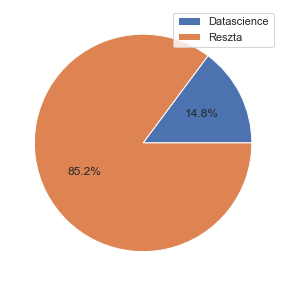

In [46]:
#Exercises:
#Can you figure out what percentage of respondents work in roles related to data science?
wszyscy=dev_type_total.values.sum()
datascience=dev_type_total.values[[10,11,13,14,15,18,19,22]].sum()
niedata=wszyscy-datascience
pie=np.array([datascience,niedata])
plt.pie(pie,autopct='%1.1f%%')
plt.legend(labels=['Datascience','Reszta'])

In [47]:
#Which positions have the highest percentage of women?

In [48]:
do_laczenia=dane_wybrane['Gender']
polaczone=dev_type.join(do_laczenia)
procenty=[]
for i in range(len(polaczone.columns)-1):
    x=polaczone.loc[polaczone[polaczone.columns[i]]==True]['Gender'] 
    y=x.loc[x=='Woman']
    procent=len(y)*100/len(x)
    procenty.append(procent)
polaczone.columns[procenty.index(max(procenty))]

'Marketing or sales professional'

<h3>Pytania</h3>

C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

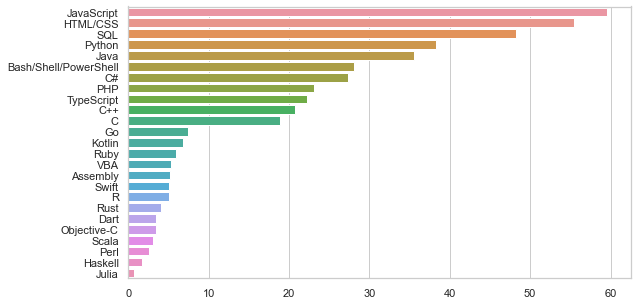

In [49]:
#Q: What are the most popular programming languages in 2020?
jez_prog=split_multicolumn(dane_wybrane.LanguageWorkedWith)
ranking=jez_prog.mean().sort_values(ascending=False)*100
sns.barplot(ranking,ranking.index)

C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Profesjonaliści')

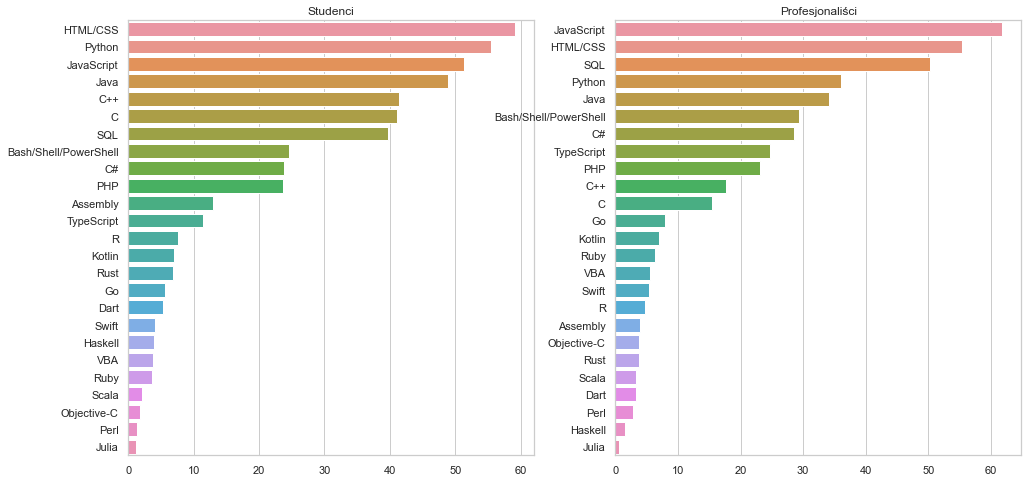

In [50]:
#Exercises:

#What are the most common languages used by students? How does the list compare with the most common
#languages used by professional developers?
fig,axes= plt.subplots(1,2,figsize=(16,8))

studenci=dane_wybrane.loc[dane_wybrane.Employment=='Student']
jez_prog1=split_multicolumn(studenci.LanguageWorkedWith)
ranking1=jez_prog1.mean().sort_values(ascending=False)*100
sns.barplot(ranking1,ranking1.index,ax=axes[0])
axes[0].set_title('Studenci')

prosi=dane_wybrane.loc[dane_wybrane.EmploymentType=='Professional']
jez_prog2=split_multicolumn(prosi.LanguageWorkedWith)
ranking2=jez_prog2.mean().sort_values(ascending=False)*100
sns.barplot(ranking2,ranking2.index,ax=axes[1])
axes[1].set_title('Profesjonaliści')

C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

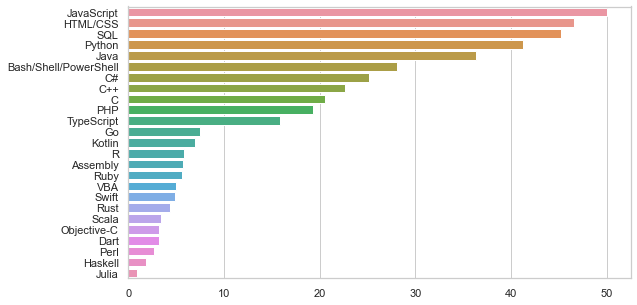

In [51]:
#What are the most common languages among respondents who do not describe themselves as
#"Developer, front-end"?
merged=dane_wybrane.join(dev_type)
merged2=merged.loc[merged['Developer, front-end']==False]
jez_prog3=split_multicolumn(merged2.LanguageWorkedWith)
ranking3=jez_prog3.mean().sort_values(ascending=False)*100
sns.barplot(ranking3,ranking3.index)

C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

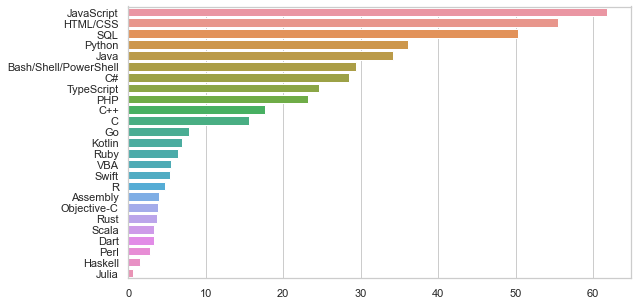

In [52]:
#What are the most common languages among respondents who work 
prosi=dane_wybrane.loc[dane_wybrane.EmploymentType=='Professional']
jez_prog2=split_multicolumn(prosi.LanguageWorkedWith)
ranking2=jez_prog2.mean().sort_values(ascending=False)*100
sns.barplot(ranking2,ranking2.index)


C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

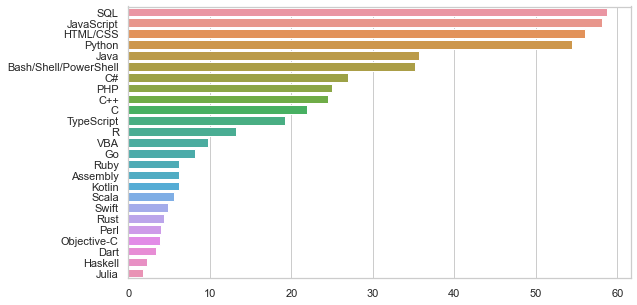

In [53]:
#What are the most common languages among respondents who work in fields related to data science?
data_sciencowe=list(dev_type_total.index[[10,11,13,14,15,18,19,22]])
contains = [dane_wybrane['DevType'].str.contains(i,na=False) for i in data_sciencowe]
resul = dane_wybrane[np.any(contains, axis=0)]
jez_prog4=split_multicolumn(resul.LanguageWorkedWith)
ranking4=jez_prog4.mean().sort_values(ascending=False)*100
sns.barplot(ranking4,ranking4.index)


C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

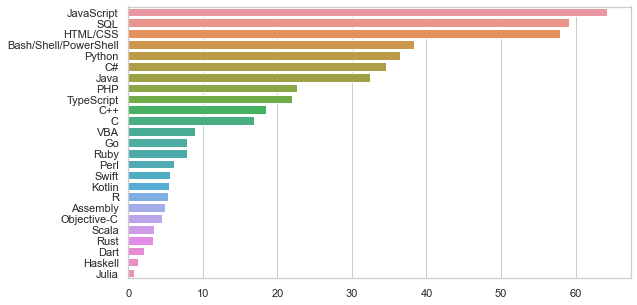

In [54]:
#What are the most common languages used by developers older than 35 years of age?
lat35=dane_wybrane.loc[dane_wybrane.Age>35]
jez_prog5=split_multicolumn(lat35.LanguageWorkedWith)
ranking5=jez_prog5.mean().sort_values(ascending=False)*100
sns.barplot(ranking5,ranking5.index)

C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

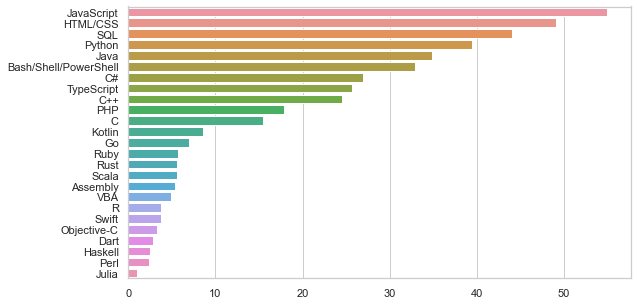

In [55]:
#What are the most common languages used by developers in your home country?
polacy=dane_wybrane.loc[dane_wybrane.Country=='Poland']
jez_prog6=split_multicolumn(polacy.LanguageWorkedWith)
ranking6=jez_prog6.mean().sort_values(ascending=False)*100
sns.barplot(ranking6,ranking6.index)

C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

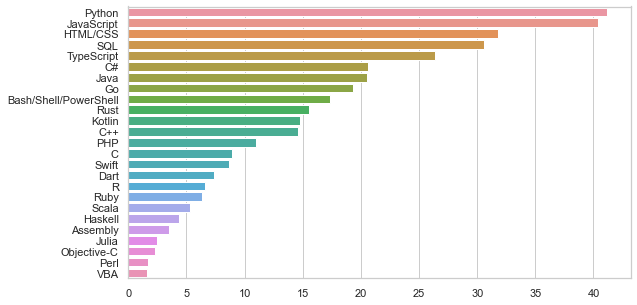

In [56]:
#Q: Which languages are the most people interested to learn over the next year?
jez_cel=split_multicolumn(dane_wybrane.LanguageDesireNextYear)
cel=jez_cel.mean().sort_values(ascending=False)*100
sns.barplot(cel,cel.index)

C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\makus\anacond

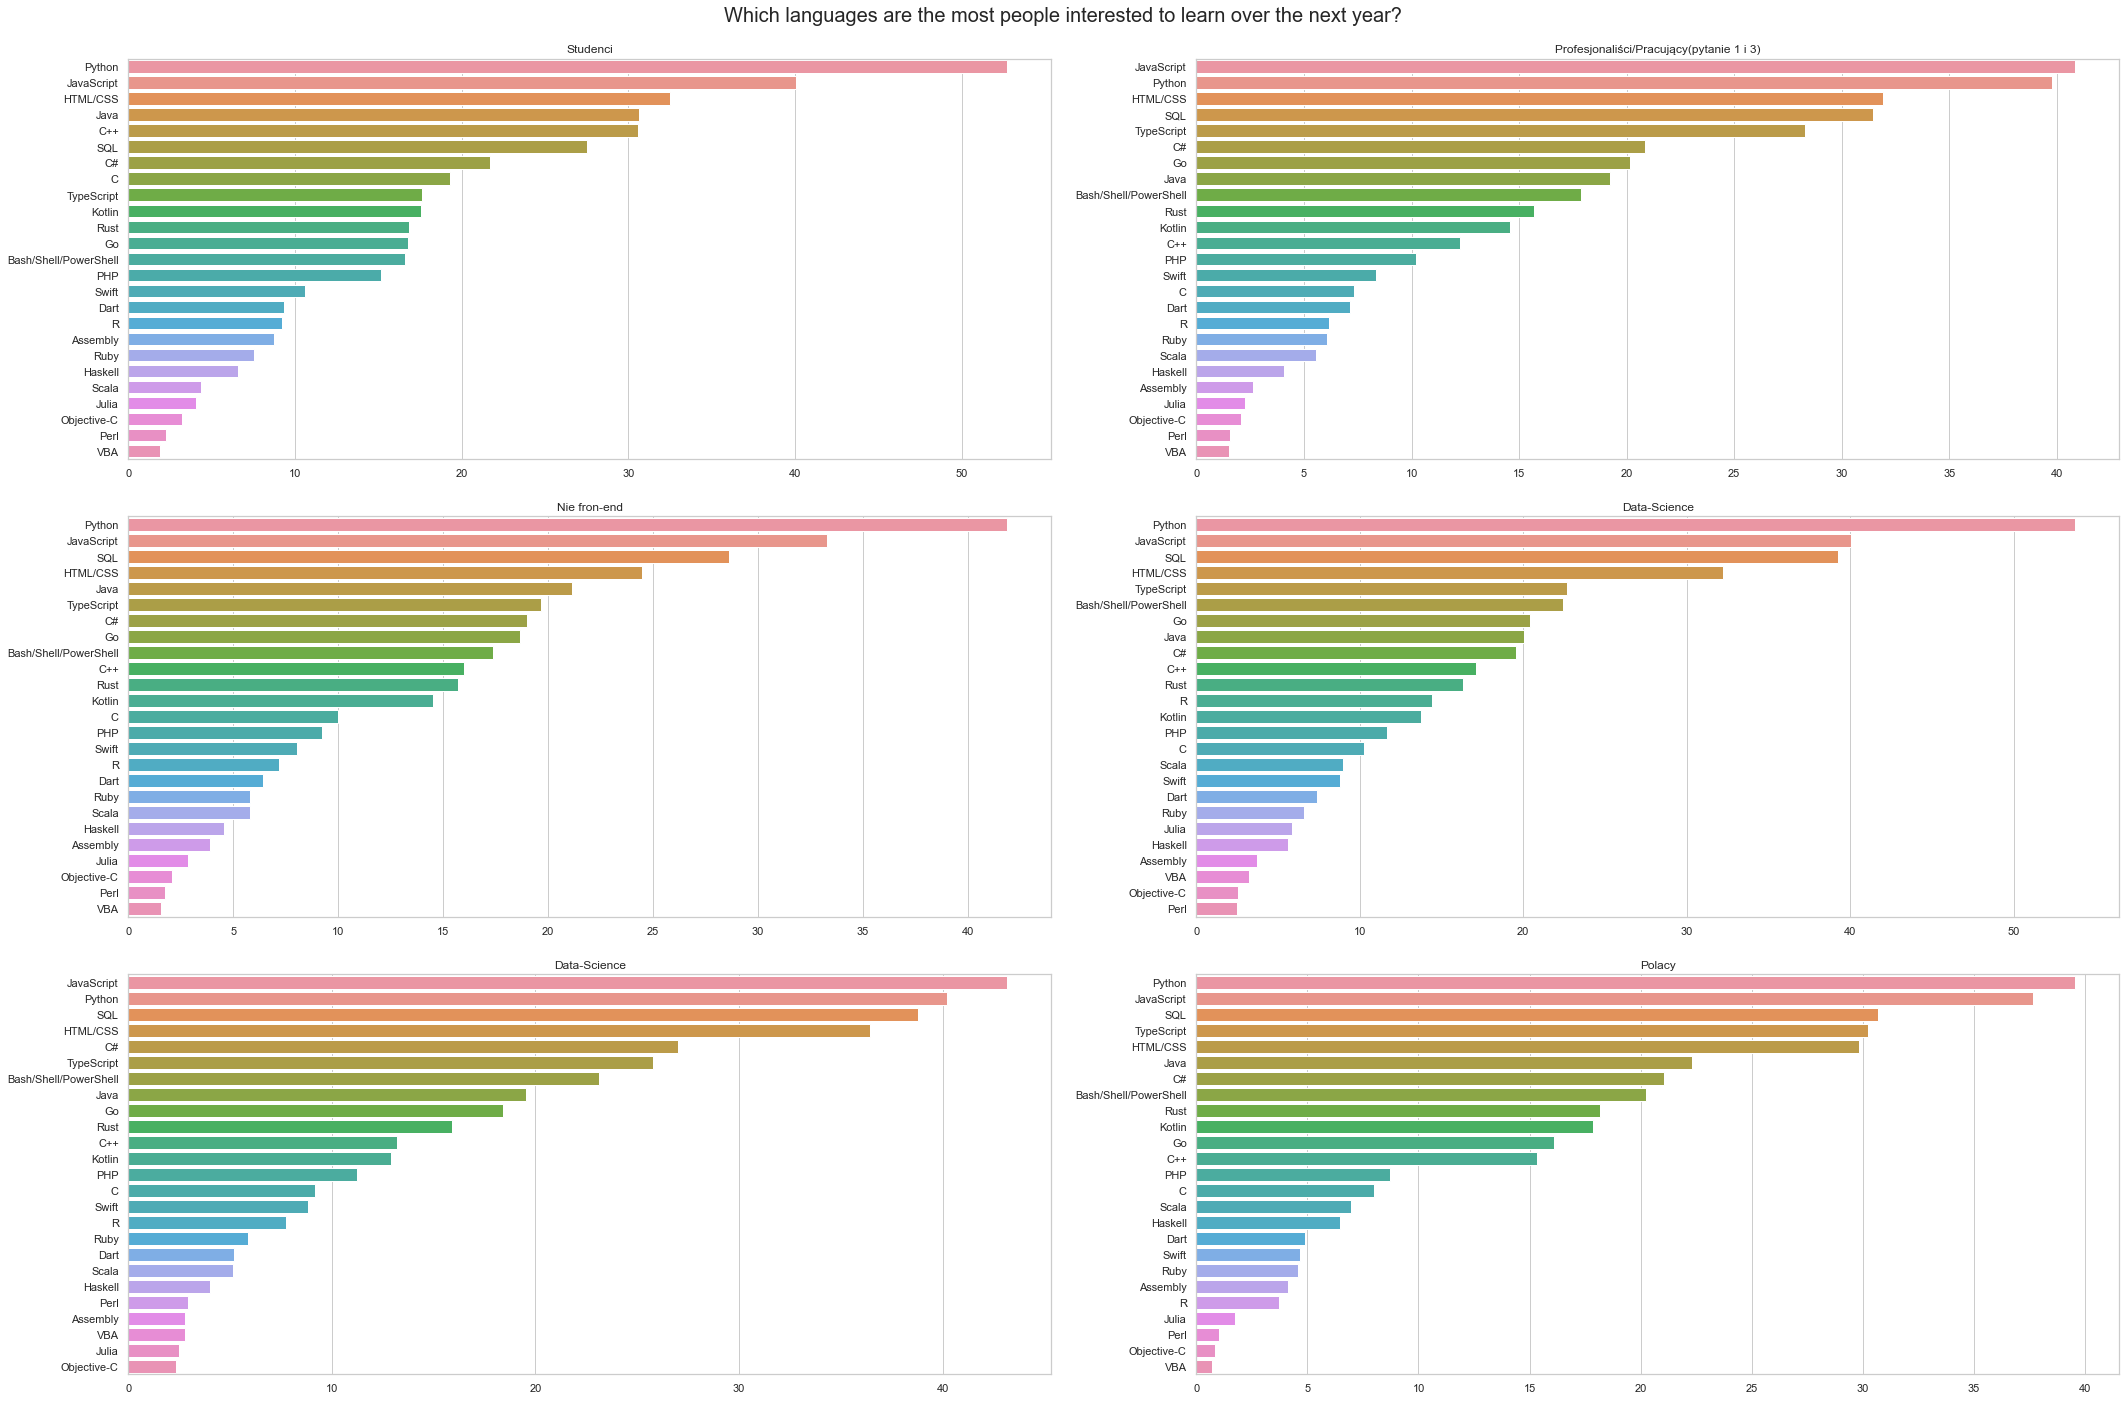

In [57]:
#Exercises: Repeat the exercises from the previous question, replacing "most common languages" with
#"languages people are interested in learning/using."
fig,axes= plt.subplots(3,2,figsize=(30,20))
fig.suptitle('Which languages are the most people interested to learn over the next year?',fontsize=20)
#1What are the languages people are interested in learning/using. used by students?
#How does the list compare with the most common languages used by professional developers?
studenci=dane_wybrane.loc[dane_wybrane.Employment=='Student']
jez_cel1=split_multicolumn(studenci.LanguageDesireNextYear)
cel1=jez_cel1.mean().sort_values(ascending=False)*100
sns.barplot(cel1,cel1.index,ax=axes[0,0])
axes[0,0].set_title('Studenci')

prosi=dane_wybrane.loc[dane_wybrane.EmploymentType=='Professional']
jez_cel2=split_multicolumn(prosi.LanguageDesireNextYear)
cel2=jez_cel2.mean().sort_values(ascending=False)*100
sns.barplot(cel2,cel2.index,ax=axes[0,1])
axes[0,1].set_title('Profesjonaliści/Pracujący(pytanie 1 i 3)')
#2What are the languages people are interested in learning/using. among respondents who do not describe themselves as
#"Developer, front-end"?
merged=dane_wybrane.join(dev_type)
merged2=merged.loc[merged['Developer, front-end']==False]
jez_cel3=split_multicolumn(merged2.LanguageDesireNextYear)
cel3=jez_cel3.mean().sort_values(ascending=False)*100
sns.barplot(cel3,cel3.index,ax=axes[1,0])
axes[1,0].set_title('Nie fron-end')

#4What are the languages people are interested in learning/using. among respondents who work in fields related to data science?
data_sciencowe=list(dev_type_total.index[[10,11,13,14,15,18,19,22]])
contains = [dane_wybrane['DevType'].str.contains(i,na=False) for i in data_sciencowe]
resul = dane_wybrane[np.any(contains, axis=0)]
jez_cel4=split_multicolumn(resul.LanguageDesireNextYear)
cel4=jez_cel4.mean().sort_values(ascending=False)*100
sns.barplot(cel4,cel4.index,ax=axes[1,1])
axes[1,1].set_title('Data-Science')

#5What are the languages people are interested in learning/using. used by developers older than 35 years of age?
lat35=dane_wybrane.loc[dane_wybrane.Age>35]
jez_cel5=split_multicolumn(lat35.LanguageDesireNextYear)
cel5=jez_cel5.mean().sort_values(ascending=False)*100
sns.barplot(cel5,cel5.index,ax=axes[2,0])
axes[2,0].set_title('Data-Science')
#6What are the languages people are interested in learning/using. used by developers in your home country?
polacy=dane_wybrane.loc[dane_wybrane.Country=='Poland']
jez_cel6=split_multicolumn(polacy.LanguageDesireNextYear)
cel6=jez_cel6.mean().sort_values(ascending=False)*100
sns.barplot(cel6,cel6.index,ax=axes[2,1])
axes[2,1].set_title('Polacy')

plt.tight_layout(pad=2)


C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'count')

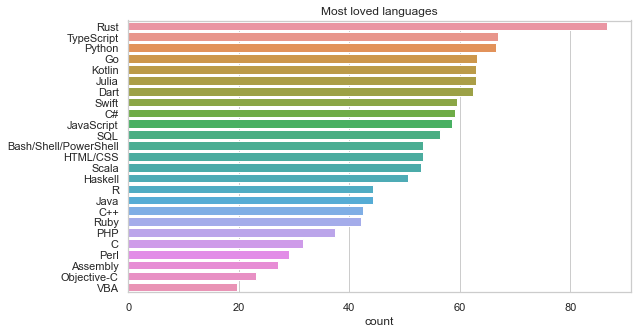

In [58]:
#Q: Which are the most loved languages, i.e., a high percentage of people who have used the language
#want to continue learning & using it over the next year?
kochane = jez_cel & jez_prog
procent_love=(kochane.sum()*100/jez_prog.sum()).sort_values(ascending=False)
sns.barplot(procent_love,procent_love.index)
plt.title("Most loved languages")
plt.xlabel('count')

C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'count')

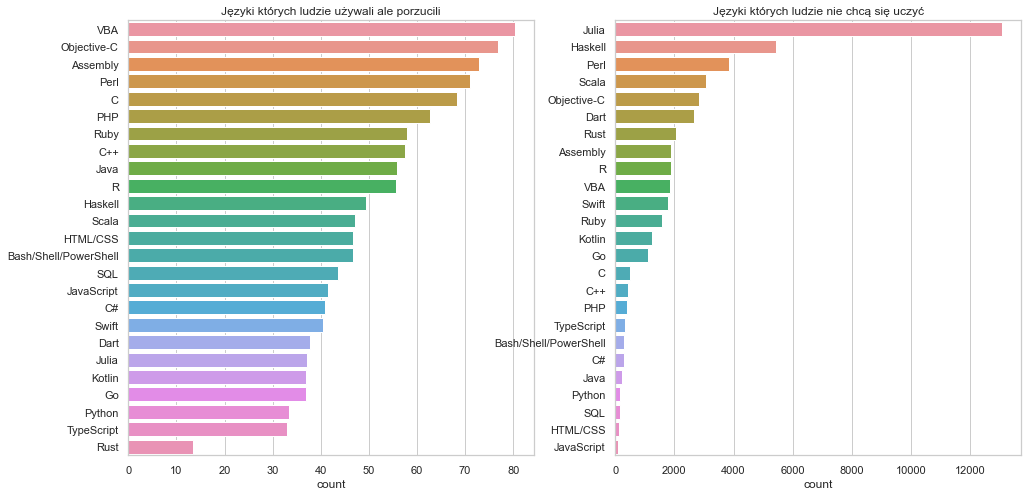

In [59]:
#Exercises: What are the most dreaded languages, i.e., languages which people have used in the past
#year but do not want to learn/use over the next year. Hint: ~languages_interested_df.
fig,axes=plt.subplots(1,2,figsize=(16,8))
meh=~ jez_cel
nielubiane= jez_prog & meh

procent_hate=(nielubiane.sum()*100/jez_prog.sum()).sort_values(ascending=False)
sns.barplot(procent_hate,procent_hate.index,ax=axes[0])
axes[0].set_title("Języki których ludzie używali ale porzucili")
axes[0].set_xlabel('count')

procent_nie=(meh.sum()*100/jez_prog.sum()).sort_values(ascending=False)
sns.barplot(procent_nie,procent_nie.index,ax=axes[1])
axes[1].set_title("Języki których ludzie nie chcą się uczyć")
axes[1].set_xlabel('count')

In [60]:
#Q: In which countries do developers work the highest number of hours per week?
#Consider countries with more than 250 responses only

kraje = dane_wybrane.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', 
                                                                                ascending=False)
kraje_odp = kraje.loc[dane_wybrane.Country.value_counts() > 250].head(15)
kraje_odp

,WorkWeekHrs
Country,
Iran,44.774476
Israel,43.880000
China,42.234848
United States,41.754227
Viet Nam,41.408696
Sri Lanka,41.384615
Turkey,40.992991
Greece,40.976891
South Africa,40.755452


In [61]:
#Exercises:
#How do the average work hours compare across continents? You may find this list of countries in
#each continent useful.
with open('Countries-Continents.txt') as f:
    lines = f.readlines()

for i in range(len(lines)):
    lines[i]=lines[i][:-1]
    lines[i]=lines[i].split(',',1)

lines=lines[1:]
kontynenty=pd.DataFrame(lines,columns=['Continent','Country'])
laczenie=dane_wybrane.merge(kontynenty, on='Country')
kontynent=laczenie.groupby('Continent')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False)
kontynent

,WorkWeekHrs
Continent,
Asia,40.408915
North America,39.905480
Oceania,39.891709
Europe,39.156251
Africa,38.617902
South America,38.483623


In [62]:
#How do the hours worked compare between freelancers and developers working full-time?
freelancers=dane_wybrane['WorkWeekHrs'].loc[dane_wybrane.Employment=='Independent contractor, freelancer, or self-employed']
fulltime=dane_wybrane['WorkWeekHrs'].loc[dane_wybrane.Employment=='Employed full-time']

print(f'Freelancerzy- średnia: {freelancers.mean()}, max: {max(freelancers)},min: {min(freelancers)}')
print(f'Full-timerzy- średnia: {fulltime.mean()}, max: {np.nanmax(fulltime)},min: {np.nanmin(fulltime)}')

Freelancerzy- średnia: 40.25342075256557, max: 140.0,min: 1.0
Full-timerzy- średnia: 40.36735212166258, max: 140.0,min: 1.0


Text(0.5, 0, 'Wiek pierwszego kodu')

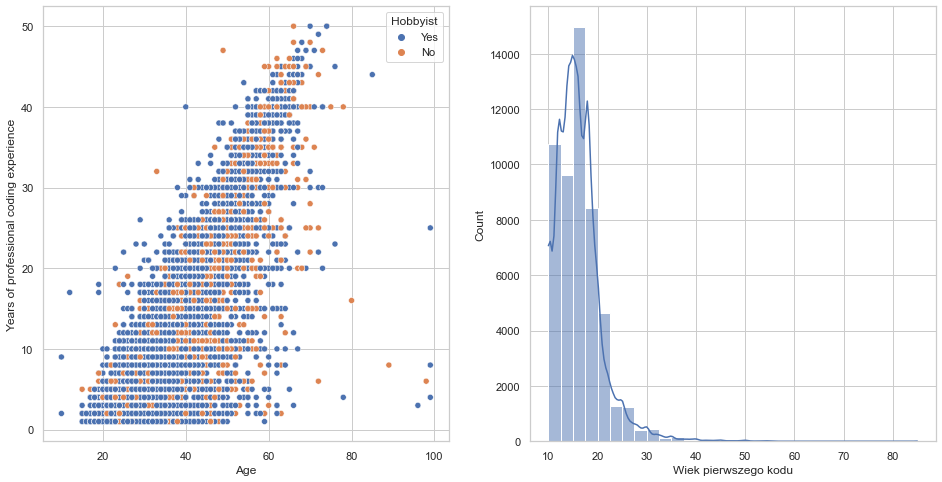

In [63]:
#Q: How important is it to start young to build a career in programming?
fig,axes=plt.subplots(1,2,figsize=(16,8))

sns.scatterplot(x='Age',y='YearsCodePro',hue='Hobbyist',data=dane_wybrane,ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Years of professional coding experience")

sns.histplot(x=dane_wybrane.Age1stCode,bins=30,ax=axes[1],kde=True)
axes[1].set_xlabel("Wiek pierwszego kodu")
# kde robi linie trendu i guess

C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\makus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


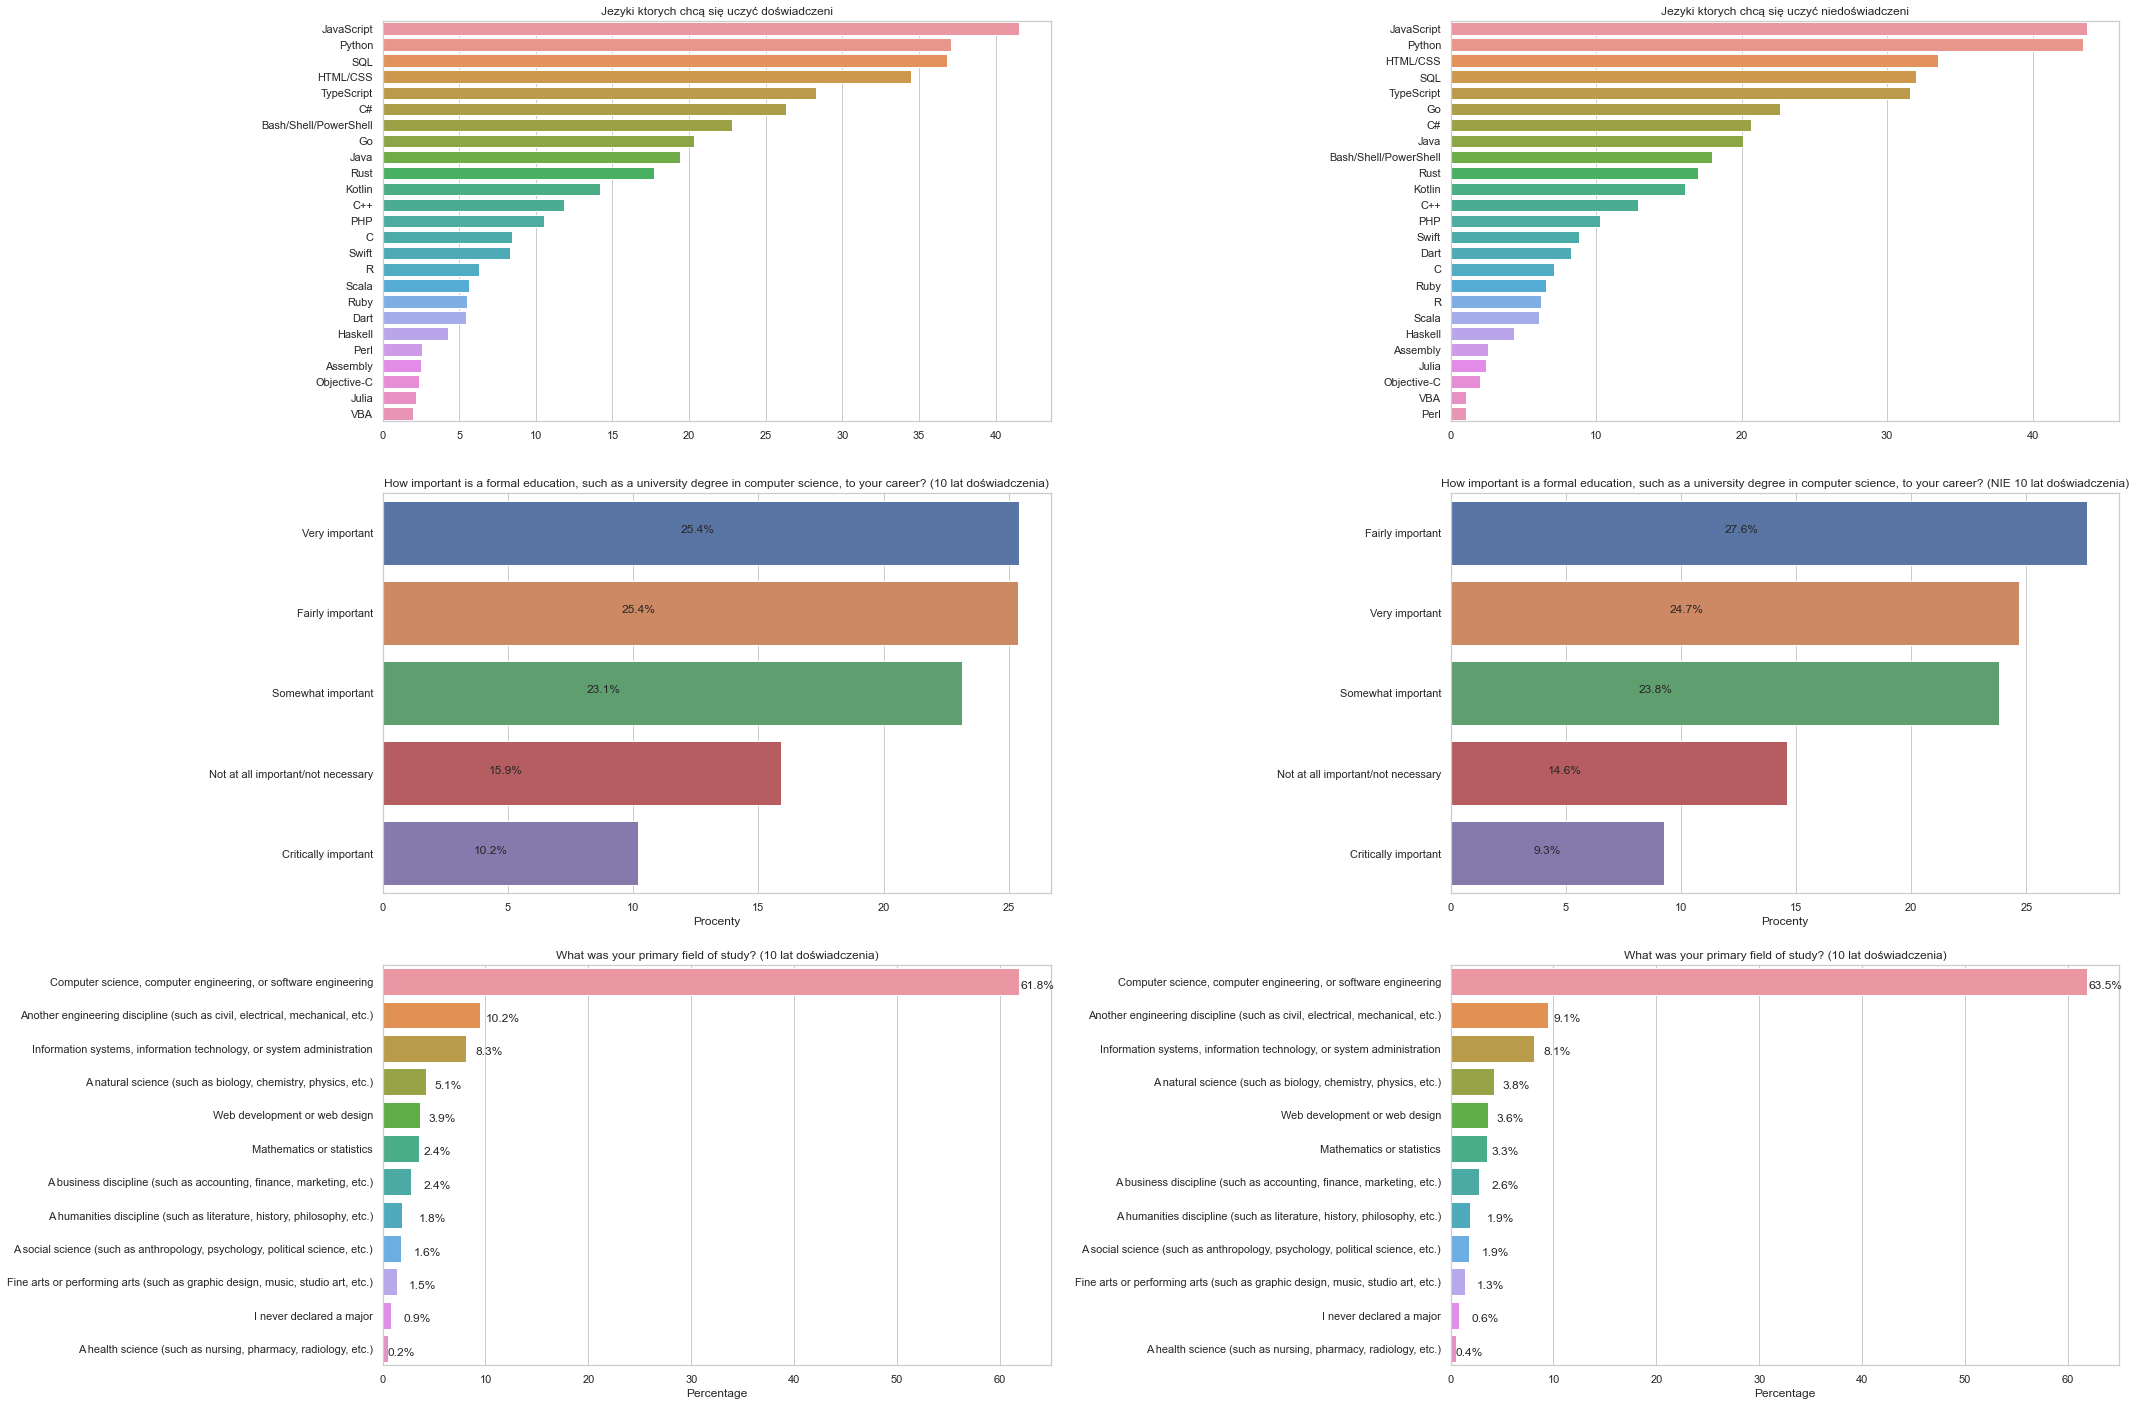

In [64]:
#Exercises:
#How does programming experience change opinions & preferences? Repeat the entire analysis 
#while comparing the responses of people who have more than ten years of professional programming
#experience vs. those who don't. Do you see any interesting trends?
pro10=dane_wybrane.loc[dane_wybrane.YearsCodePro>=10]
nie10=dane_wybrane.loc[dane_wybrane.YearsCodePro<10]

fig,axes=plt.subplots(3,2,figsize=(30,20))

jez_cel1=split_multicolumn(pro10.LanguageDesireNextYear)
cel1=jez_cel1.mean().sort_values(ascending=False)*100
sns.barplot(cel1,cel1.index,ax=axes[0,0])
axes[0,0].set_title('Jezyki ktorych chcą się uczyć doświadczeni')

jez_cel2=split_multicolumn(nie10.LanguageDesireNextYear)
cel2=jez_cel2.mean().sort_values(ascending=False)*100
sns.barplot(cel2,cel2.index,ax=axes[0,1])
axes[0,1].set_title('Jezyki ktorych chcą się uczyć niedoświadczeni')

pro10_pct = pro10.NEWEdImpt.value_counts() * 100 / pro10.NEWEdImpt.count()

axes[1,0].set_title(f'{schemat.NEWEdImpt} (10 lat doświadczenia)')
sns.barplot(x=pro10_pct,y=pro10_pct.index,ax=axes[1,0])
axes[1,0].set_xlabel('Procenty')
x0=[]
y0=[]
for p in ax.patches:
    percentage=list(round(pro10.NEWEdImpt.value_counts() * 100 / pro10.NEWEdImpt.count(),1))
    x =p.get_x() + p.get_width()+0.02
    x0.append(x)
    y =p.get_y()+p.get_height()/2
    y0.append(y)
x0[0]=x0[0]-50
for i in range(len(percentage)):
    axes[1,0].annotate(f'{percentage[i]}%', (x0[i], y0[i]))

nie10_pct = nie10.NEWEdImpt.value_counts() * 100 / nie10.NEWEdImpt.count()

axes[1,1].set_title(f'{schemat.NEWEdImpt} (NIE 10 lat doświadczenia)')
sns.barplot(x=nie10_pct,y=nie10_pct.index,ax=axes[1,1])
axes[1,1].set_xlabel('Procenty')
x0=[]
y0=[]
for p in ax.patches:
    percentage=list(round(nie10.NEWEdImpt.value_counts() * 100 / nie10.NEWEdImpt.count(),1))
    x =p.get_x() + p.get_width()+0.02
    x0.append(x)
    y =p.get_y()+p.get_height()/2
    y0.append(y)
x0[0]=x0[0]-50
for i in range(len(percentage)):
    axes[1,1].annotate(f'{percentage[i]}%', (x0[i], y0[i]))


pro10p_pct = pro10.UndergradMajor.value_counts() * 100 / pro10.UndergradMajor.count()
ax=sns.barplot(x=undergrad_pct, y=undergrad_pct.index,ax=axes[2,0])
axes[2,0].set_title(f'{schemat.UndergradMajor} (10 lat doświadczenia)')
axes[2,0].set_ylabel(None);
axes[2,0].set_xlabel('Percentage');
percentage=list(map('{:.1f}%'.format,pro10p_pct.values))
axes[2,0].annotate(percentage[0],(62,0.2))
axes[2,0].annotate(percentage[1],(10,1.2))
axes[2,0].annotate(percentage[2],(9,2.2))
axes[2,0].annotate(percentage[3],(5,3.2))
axes[2,0].annotate(percentage[4],(4.5,4.2))
axes[2,0].annotate(percentage[5],(4,5.2))
axes[2,0].annotate(percentage[6],(4,6.2))
axes[2,0].annotate(percentage[7],(3.5,7.2))
axes[2,0].annotate(percentage[8],(3,8.2))
axes[2,0].annotate(percentage[9],(2.5,9.2))
axes[2,0].annotate(percentage[10],(2,10.2))
axes[2,0].annotate(percentage[-1],(0.5,11.2))

nie10p_pct = nie10.UndergradMajor.value_counts() * 100 / nie10.UndergradMajor.count()
ax=sns.barplot(x=undergrad_pct, y=undergrad_pct.index,ax=axes[2,1])
axes[2,1].set_title(f'{schemat.UndergradMajor} (10 lat doświadczenia)')
axes[2,1].set_ylabel(None);
axes[2,1].set_xlabel('Percentage');
percentage=list(map('{:.1f}%'.format,nie10p_pct.values))
axes[2,1].annotate(percentage[0],(62,0.2))
axes[2,1].annotate(percentage[1],(10,1.2))
axes[2,1].annotate(percentage[2],(9,2.2))
axes[2,1].annotate(percentage[3],(5,3.2))
axes[2,1].annotate(percentage[4],(4.5,4.2))
axes[2,1].annotate(percentage[5],(4,5.2))
axes[2,1].annotate(percentage[6],(4,6.2))
axes[2,1].annotate(percentage[7],(3.5,7.2))
axes[2,1].annotate(percentage[8],(3,8.2))
axes[2,1].annotate(percentage[9],(2.5,9.2))
axes[2,1].annotate(percentage[10],(2,10.2))
axes[2,1].annotate(percentage[-1],(0.5,11.2))




plt.tight_layout(pad=2)

In [65]:
#Compare the years of professional coding experience across different genders
dane_wybrane.groupby('Gender')[['YearsCodePro']].mean().sort_values('YearsCodePro',ascending=False)

,YearsCodePro
Gender,
Man,8.850020
Woman,6.730530
"Non-binary, genderqueer, or gender non-conforming",6.647059
